In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# data visualisation


In [ ]:

jump = np.array(pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/jump_set.csv"))
run = np.array(pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/run_set.csv"))
squat = np.array(pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/squat_set.csv"))
walk = np.array(pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/walk_set.csv"))
other = np.array(pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/other_set.csv"))
print(jump.shape)
print(type(jump))
# jump

(11900, 6)
<class 'numpy.ndarray'>


In [ ]:
SAMPLES_PER_GESTURE = 119 # assuming one actitvity takes 1sec and freq of sensor is 119Hz
GESTURES = ["jump", "run", "squat", "walk", "other"]
jumparr = np.array(jump).reshape(-1,SAMPLES_PER_GESTURE,6) #convrting 11900*6 to 3d tensor 100*119*6 where each row will be representing a sample(119)
runarr = np.array(run).reshape(-1,SAMPLES_PER_GESTURE,6)#-1 used for making dimension equal to remaining data when other two dimensions are choosen
squatarr = np.array(squat).reshape(-1,SAMPLES_PER_GESTURE,6)
walkarr = np.array(walk).reshape(-1,SAMPLES_PER_GESTURE,6)
otherarr = np.array(other).reshape(-1,SAMPLES_PER_GESTURE,6)

jumparr.shape

(100, 119, 6)

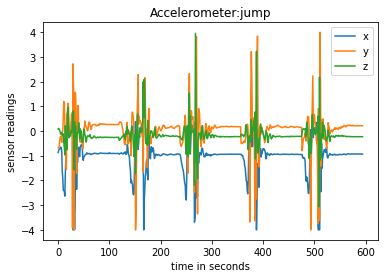

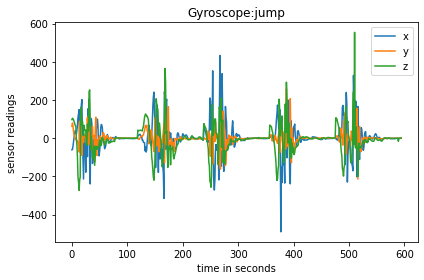

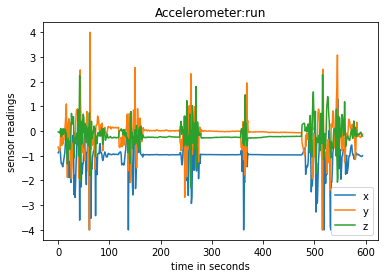

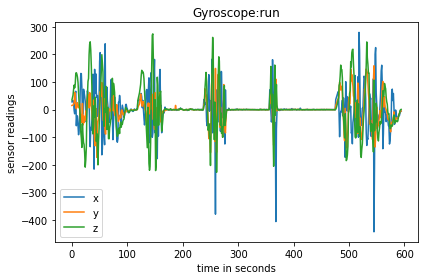

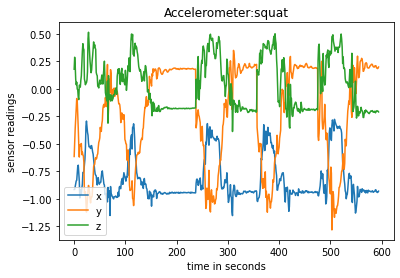

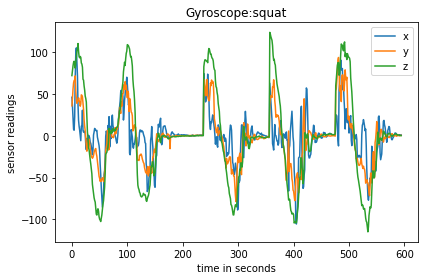

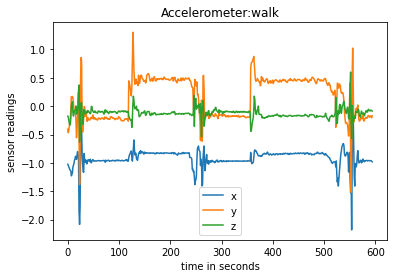

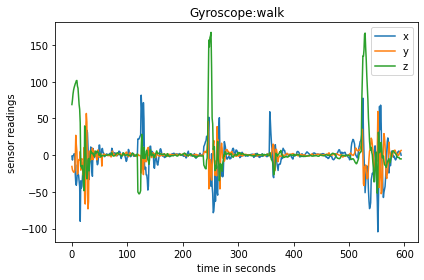

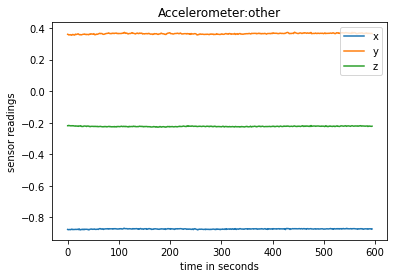

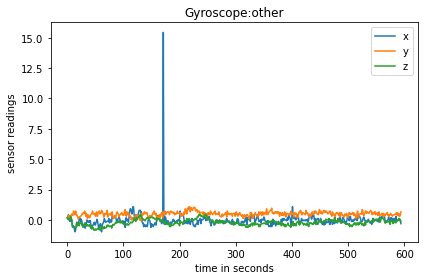

In [ ]:
# For 5 seconds (5*119 readings)
for gesture in GESTURES:
  
  fig1, ax1 = plt.subplots()
  fig2, ax2 = plt.subplots()
  axes=[ax1,ax2]
  for i,axis in enumerate(axes):
    if i is 0:
      axis.set_title("Accelerometer:" + gesture)
    else:
      axis.set_title("Gyroscope:" + gesture) 
    
    axis.plot(eval(gesture)[:(5*119),3*i], label="x")
    axis.plot(eval(gesture)[:(5*119),3*i+1], label="y")
    axis.plot(eval(gesture)[:(5*119),3*i+2], label="z")
    axis.set_xlabel('time in seconds')
    axis.set_ylabel('sensor readings')
    plt.tight_layout()
    axis.legend()


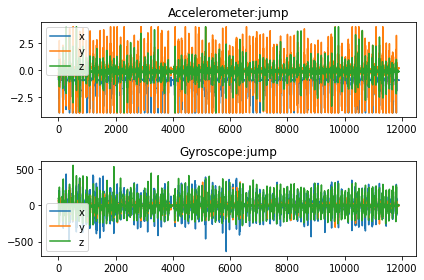

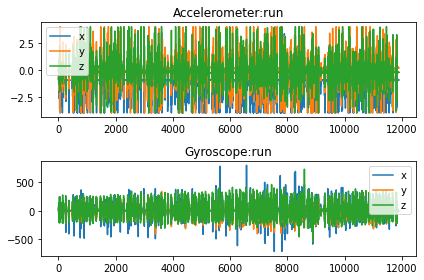

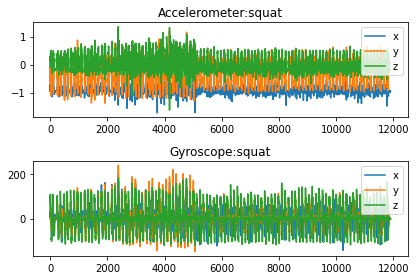

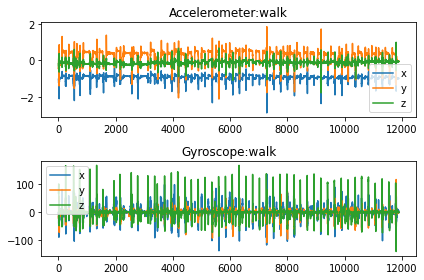

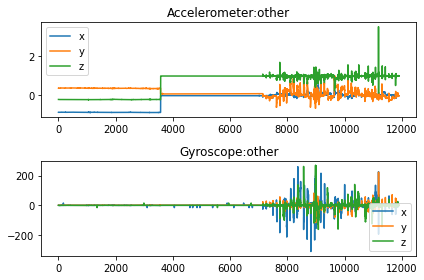

In [ ]:
# For all sample (11900 readings)
for gesture in GESTURES:
  
  fig, ax = plt.subplots(2,1)
  for i,row in enumerate(ax):
    if i is 0:
      row.set_title("Accelerometer:" + gesture)
    else:
      row.set_title("Gyroscope:" + gesture) 
    
    row.plot(eval(gesture)[:,3*i], label="x")
    row.plot(eval(gesture)[:,3*i+1], label="y")
    row.plot(eval(gesture)[:,3*i+2], label="z")
    plt.tight_layout()
    row.legend()

# preparing data for training


In [ ]:
inputs = np.array([eval(gesture + "arr") for gesture in GESTURES])#one array containing all gesture's data
inputs.shape, jump.shape, jumparr.shape

((5, 100, 119, 6), (11900, 6), (100, 119, 6))

In [ ]:
NUM_GESTURES = len(GESTURES) #GESTURES = ["jump", "run", "squat", "walk", "other"]
ONE_HOT_ENCODED = np.eye(NUM_GESTURES)
print(ONE_HOT_ENCODED)
outputs = np.array([[ONE_HOT_ENCODED[i] for sample in arr_gesture] for i,arr_gesture in enumerate(inputs)])
print(outputs.shape)
# arr_gesture will have five arrays of shape(100,119,6) because enumerate is used om inputs(5*100*119*6)
# each of these five(arr_gesture) array belong to on of the gesture so one hot encoding can be applied to each of these five
# also each of arr_gesture has 100 samples of (119,6), so input dim. to NN will be 119*6
# therefore, total samples will be 100*5(gestures) and 100*5 of outputs will also be needed

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
(5, 100, 5)


In [ ]:
outputs.shape, inputs.shape

((5, 100, 5), (5, 100, 119, 6))

In [ ]:
X = inputs.reshape(-1,SAMPLES_PER_GESTURE, 6)
Y = outputs.reshape(-1, 5)
X.shape, Y.shape

((500, 119, 6), (500, 5))

In [ ]:
print(f'ax min.: {X[:,:,0].min()}, ax max.:{X[:,:,0].max()}')
print(f'ay min.: {X[:,:,1].min()}, ay max.:{X[:,:,1].max()}')
print(f'az min.: {X[:,:,2].min()}, az max.:{X[:,:,2].max()}')
print(f'gx min.: {X[:,:,3].min()}, gx max.:{X[:,:,3].max()}')
print(f'gy min.: {X[:,:,4].min()}, gy max.:{X[:,:,4].max()}')
print(f'gz min.: {X[:,:,5].min()}, gz max.:{X[:,:,5].max()}')

# sensors_min_max= [(ax_min,ax_max),(ay_min,ay_max),(az_min,az_max),(gx_min,gx_max),(gy_min,gy_max),(gz_min,gz_max)]
sensors_min_max= []
for i in range(6):
  sensors_min_max.append([X[:,:,i].min(),X[:,:,i].max()])
print(sensors_min_max)


ax min.: -4.0, ax max.:4.0
ay min.: -4.0, ay max.:4.0
az min.: -4.0, az max.:4.0
gx min.: -712.341, gx max.:792.725
gy min.: -404.175, gy max.:336.365
gz min.: -542.908, gz max.:724.243
[[-4.0, 4.0], [-4.0, 4.0], [-4.0, 4.0], [-712.341, 792.725], [-404.175, 336.365], [-542.908, 724.243]]


In [ ]:
for i in range(6):
  X[:,:,i] = (X[:,:,i] - sensors_min_max[i][0]) / (sensors_min_max[i][1]-sensors_min_max[i][0])

sensors_min_max_normalised=[]
for i in range(6):
  sensors_min_max_normalised.append([X[:,:,i].min(),X[:,:,i].max()])
print(f"after normalisation, min and amx values are: {sensors_min_max_normalised}")

# X[:,:,0] = (X[:,:,0] + 4)/8 
# X[:,:,1] = (X[:,:,1] + 4)/8 
# X[:,:,2] = (X[:,:,2] + 4)/8 
# X[:,:,3] = (X[:,:,3] + 712.314)/(712.314+792.725) 
# X[:,:,4] = (X[:,:,4] + 404.175)/(404.175+336.365)
# X[:,:,5] = (X[:,:,5] + 542.908)/(542.908+724.243)

after normalisation, min and amx values are: [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]


In [ ]:
# input_dim= (119,6)
input_dim= X[0].shape
input_dim

(119, 6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# DL model-simple

In [ ]:
model = tf.keras.Sequential(
      [
       tf.keras.layers.Dense(128,input_shape=input_dim, activation="relu"),
       tf.keras.layers.Dense(256, activation='relu'),
       tf.keras.layers.Dropout(.1),
       tf.keras.layers.Dense(64, activation='relu'),
       tf.keras.layers.Dense(32, activation='relu'),
       tf.keras.layers.Dropout(.1),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(5,activation = "softmax")
      ])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 119, 128)          896       
_________________________________________________________________
dense_1 (Dense)              (None, 119, 256)          33024     
_________________________________________________________________
dropout (Dropout)            (None, 119, 256)          0         
_________________________________________________________________
dense_2 (Dense)              (None, 119, 64)           16448     
_________________________________________________________________
dense_3 (Dense)              (None, 119, 32)           2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 119, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 3808)              0

In [ ]:
model.fit(X_train, y_train,
          epochs = 200,
          validation_split = 0.2,
          batch_size=10,
          verbose=True)

In [ ]:
predictions = model.predict(X_test)

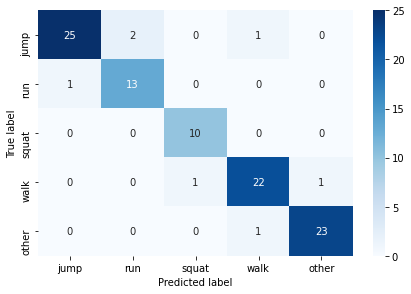

In [ ]:
cm = tf.math.confusion_matrix(labels=tf.argmax(y_test, 1), predictions=tf.argmax(predictions, 1))
axis_labels = GESTURES
figure = plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels)
plt.ylim(len(cm)-0, 0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
model.save('models/first.h5')